Accuracy with C=0.1: 0.83


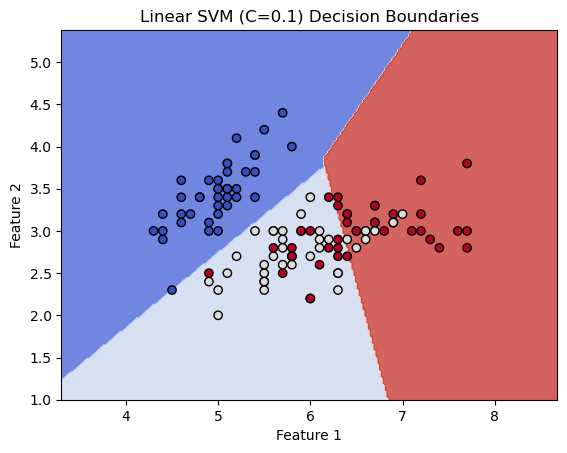

Accuracy with C=1: 0.90


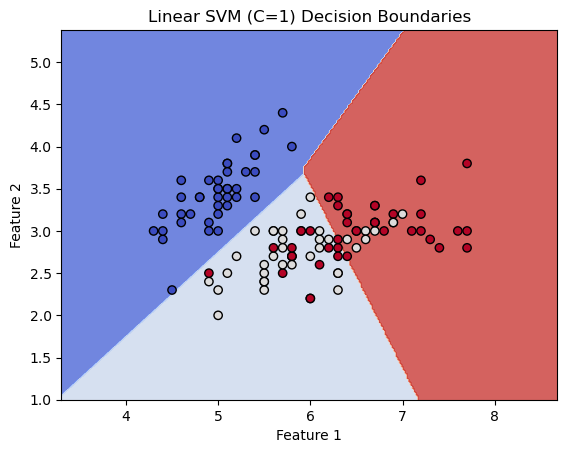

Accuracy with C=10: 0.90


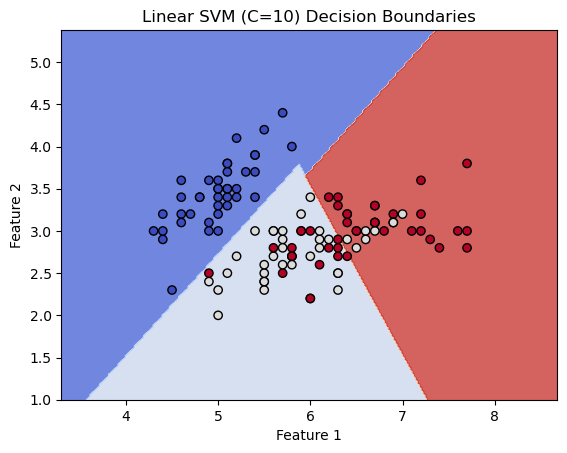

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Using only two features for visualization
y = iris.target

# Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear SVM classifier
def train_linear_svm(X_train, y_train, C=1.0):
    svm_clf = SVC(kernel='linear', C=C)
    svm_clf.fit(X_train, y_train)
    return svm_clf

# Predict labels for the testing set
def predict_and_evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return y_pred, accuracy

# Visualize decision boundaries
def plot_decision_boundaries(X, y, model, title):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', marker='o')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Train and evaluate linear SVM with different values of C
C_values = [0.1, 1, 10]
for C in C_values:
    svm_model = train_linear_svm(X_train, y_train, C=C)
    y_pred, accuracy = predict_and_evaluate(svm_model, X_test, y_test)
    print(f"Accuracy with C={C}: {accuracy:.2f}")

    plot_decision_boundaries(X_train, y_train, svm_model, f"Linear SVM (C={C}) Decision Boundaries")

